# Customer Segmentation Example with K-Means
#### In this notebook you can find an example of clustering customers into segments, according to their loyalty and satisfaction attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

### Load the Data
The Data consists of two columns. First is customer satisfaction adn second is Loyalty. As can be seen, Loyalty column is already scaled (between -2.5 and 2.5).

In [2]:
data1 = pd.read_csv('3.12. Example.csv')
data1.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Plot the Data

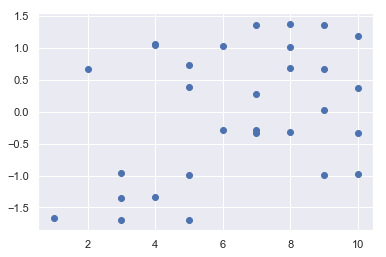

In [4]:
plt.scatter(data1['Satisfaction'], data1['Loyalty'])
plt.show()

In [5]:
x = data1.copy()

In [6]:
km = KMeans(2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
clusters = x.copy()
clusters['Predicted_Clusters'] = km.fit_predict(x)

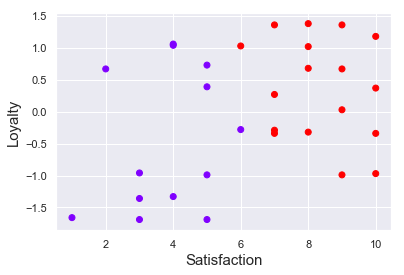

In [8]:
plt.scatter(clusters['Satisfaction'],  clusters['Loyalty'], c=clusters['Predicted_Clusters'], cmap='rainbow')
plt.xlabel('Satisfaction', fontsize=15)
plt.ylabel('Loyalty', fontsize=15)
plt.show()

These clusters look a little bit flawed. Because we didn't standardize the __'Satisfaction'__ values, it dominated __'Loyalty'__ values and __'Satisfaction'= 6__ is the line seperating the clusters.

### Standardize

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

C:\Users\yigit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Apply Elbow Method

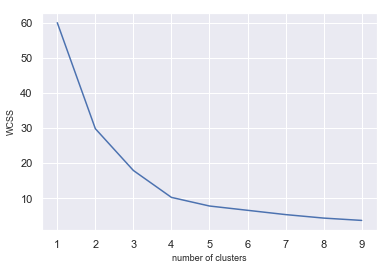

In [12]:
wcss = []

for i in range(1,10):
    km2 = KMeans(i)
    km2.fit(x_scaled)
    wcss.append(km2.inertia_)
    
plt.plot(range(1,10), wcss)
plt.xlabel('number of clusters', fontsize=9)
plt.ylabel('WCSS', fontsize=9)
plt.show()

Candidates for ideal cluster numbers seem to be: __2, 3, 4__ and __5__.

### Explore possible clustering solutions

An ımportant detail is that, we use original columns data in __clusters_new dataframes__. But we use predicted clusters columns, which are predicted with x_scaled.  

In [14]:
km_new1 = KMeans(2)
km_new1.fit(x_scaled)
clusters_new1 = x.copy()
clusters_new1['Prediction'] = km_new1.fit_predict(x_scaled)

km_new2 = KMeans(3)
km_new2.fit(x_scaled)
clusters_new2 = x.copy()
clusters_new2['Prediction'] = km_new2.fit_predict(x_scaled)

km_new3 = KMeans(4)
km_new3.fit(x_scaled)
clusters_new3 = x.copy()
clusters_new3['Prediction'] = km_new3.fit_predict(x_scaled)

km_new4 = KMeans(5)
km_new4.fit(x_scaled)
clusters_new4 = x.copy()
clusters_new4['Prediction'] = km_new4.fit_predict(x_scaled)

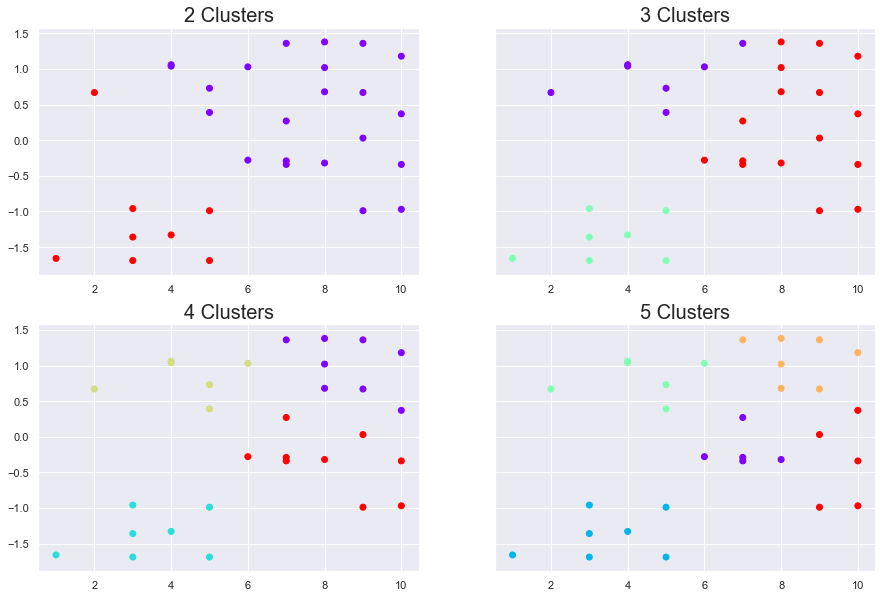

In [24]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize= (15,10))

ax1.scatter(clusters_new1['Satisfaction'], clusters_new1['Loyalty'], c=clusters_new1['Prediction'], cmap='rainbow')
ax1.set_title('2 Clusters', fontsize=20)

ax2.scatter(clusters_new2['Satisfaction'], clusters_new2['Loyalty'], c=clusters_new2['Prediction'], cmap='rainbow')
ax2.set_title('3 Clusters', fontsize=20)

ax3.scatter(clusters_new3['Satisfaction'], clusters_new2['Loyalty'], c=clusters_new3['Prediction'], cmap='rainbow')
ax3.set_title('4 Clusters', fontsize=20)

ax4.scatter(clusters_new4['Satisfaction'], clusters_new4['Loyalty'], c=clusters_new4['Prediction'], cmap='rainbow')
ax4.set_title('5 Clusters', fontsize=20)
plt.show()

In __TWO__ clusters graph:
Lower left part(red) is the <font color=red>__alienated customers cluster__</font>, who are neither loyal nor satisfied. But the other <font color=purple>__purple__</font> cluster is everyone else. So _2_ might not be a good cluster number.

In __THREE__ clusters graph:
Lower left part(light green) is again the <font color=green>__alienated customers cluster__</font>, who are neither loyal nor satisfied. The purple cluster is <font color=purple>__supporters__</font>, who are loyal but aren't much satisfied. The <font color=red>__red__</font> cluster is not very clear. So _3_ might not be the best cluster number.

In __FOUR__ clusters graph:
Lower left part(light blue) is again the <font color=blue>__alienated customers cluster__</font>, who are neither loyal nor satisfied. 
The yellow cluster is <font color=gold>__supporters__</font>, who are loyal but aren't much satisfied. 
The red cluster is <font color=red>__roamers__</font>, who are averagely or not very loyal to the brand but the enjoy buying products.
The purple cluster is <font color=purple>__fans__</font>, who are both highly loyal and satisfied. 
So _4_ might be the best cluster number.

In __FIVE__ clusters graph:
Lower left part(light blue) is again the <font color=blue>__alienated customers cluster__</font>, who are neither loyal nor satisfied. 
The light green cluster is <font color=green>__supporters__</font>, who are loyal but aren't much satisfied. 
The orange cluster is <font color=orange>__fans__</font>, who are both highly loyal and satisfied.
There is something different than 4 clusters graph:
The <font color=red>__red__</font> and <font color=purple>__purple__</font> clusters are __roamers__. They are split in two groups.
_5_ might be a good cluster number -- according to the purpose of segmentation.

As a more general approach we can say that, __4 clusters__ seems like the best solution. __2 and 3__ clusters are not enough to explain the story. __5__ clusters is also possibly useful.